In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams.update({
    "lines.linewidth": 10,
})

sns.set(font_scale=1.3)
import pandas as pd
import pickle
import numpy as np


## DROPE

In [2]:
df = pd.read_pickle("pkls/eval_results.pkl")
df

,delta,n,seed,algo,W_n,d2W_n,d2phi_n,dW_n,dphi_n,phi_n,converged,alpha,J_11,J_21,W_n_DR,W_n_IPW,dW_n_DR,dW_n_IPW
0,0.1,1000,0,snips,0.909491,0.088368,-0.138344,-0.006819,-1.095934e-04,-0.007661,True,1.493242,NaN,NaN,NaN,NaN,NaN,NaN
1,0.1,1000,0,xfitted_snips,1.025974,0.207076,-0.131162,-0.195725,-1.128167e-04,-0.190941,True,1.519723,NaN,NaN,NaN,NaN,NaN,NaN
2,0.1,1000,0,ldr,210.909317,NaN,76261.187500,-312.578003,2.682612e+00,-0.993268,False,0.182203,-9416.380859,14474.759766,-0.595899,211.505234,0.027595,-312.605621
3,0.1,1000,0,sn_ldr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.1,1000,0,ground_truth_propensity_ldr,0.905881,NaN,-0.136191,-0.001569,8.230563e-08,-0.001732,True,1.501959,-0.002340,0.188819,-0.019182,0.925063,0.003711,-0.005279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.3,20000,29,xfitted_snips,0.962224,1.579523,-0.710768,-0.215018,-2.980232e-08,-0.223459,True,0.854555,NaN,NaN,NaN,NaN,NaN,NaN
0,0.3,20000,29,ldr,0.935467,NaN,-0.462784,-0.184523,-1.147389e-06,-0.197253,True,0.845527,-0.322436,0.698169,-0.071142,1.006609,0.045991,-0.230514
0,0.3,20000,29,sn_ldr,0.934164,NaN,-0.447320,-0.182817,1.758337e-06,-0.195700,True,0.843911,-0.311798,0.672777,-0.031286,0.965450,0.039241,-0.222058
0,0.3,20000,29,ground_truth_propensity_ldr,0.928698,NaN,-0.465177,-0.176356,1.117587e-06,-0.189895,True,0.840141,-0.249032,0.616089,0.000881,0.927817,-0.000581,-0.175776


In [3]:
from collections import defaultdict
dataset = "linear_5"
delta_list = [0.1,0.2,0.3]
num_seeds = 30


agg = {delta: {} for delta in delta_list}

## Calculate ground truth
keys = ["alpha", "phi_n"]
for key in keys:
    res = defaultdict(list)
    for delta in delta_list:
        for seed in range(num_seeds):
            meta_path = f"data/{dataset}/{seed}/meta.pkl"
            with open(meta_path, "rb") as f:
                metadata = pickle.load(f)
            res[delta].append(metadata["ground_truth"][delta][key])

    for delta in delta_list:
        a = np.array(res[delta])
        
        agg[delta][key] = (a.mean(), a.std())
        
agg

{0.1: {'alpha': (1.4381886072349157, 0.0012168073730225459),
  'phi_n': (0.01752744863430659, 0.0008122546391593601)},
 0.2: {'alpha': (1.026912458978225, 0.0009313149032025173),
  'phi_n': (-0.10222550382216772, 0.000766128756360555)},
 0.3: {'alpha': (0.8432040902709395, 0.0008290903551119979),
  'phi_n': (-0.19481540868679684, 0.000743505505341744)}}

In [4]:
## Calculate MSE
for key in keys:
    df[f"mse_{key}"] = 0.0

for delta in delta_list:
    for key in keys:
        df.loc[df["delta"] == delta, f"mse_{key}"] = abs(df[df["delta"] == delta][key] - agg[delta][key][0]) ** 2

,$\delta$,n,seed,Algorithm,W_n,d2W_n,d2phi_n,dW_n,dphi_n,phi_n,...,alpha,J_11,J_21,W_n_DR,W_n_IPW,dW_n_DR,dW_n_IPW,mse_alpha,mse_phi_n,Known Propensities?
0,0.1,1000,0,SNIPS (benchmark),0.909491,0.088368,-0.138344,-0.006819,-1.095934e-04,-0.007661,...,1.493242,NaN,NaN,NaN,NaN,NaN,NaN,3.030911e-03,6.344452e-04,True
1,0.1,1000,0,SNIPS (benchmark),1.025974,0.207076,-0.131162,-0.195725,-1.128167e-04,-0.190941,...,1.519723,NaN,NaN,NaN,NaN,NaN,NaN,6.647875e-03,4.345917e-02,False
3,0.1,1000,0,LDR$^2$OPE (proposal),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
5,0.1,1000,0,LDR$^2$OPE (proposal),0.904781,NaN,-0.134173,0.000085,2.117304e-09,0.000094,...,1.501355,-0.002352,0.185792,-0.004689,0.909469,0.005388,-0.005303,3.990056e-03,3.039175e-04,True
6,0.1,1000,1,SNIPS (benchmark),0.836437,0.025541,-0.153697,0.088306,-1.040772e-04,0.105434,...,1.341335,NaN,NaN,NaN,NaN,NaN,NaN,9.380713e-03,7.727528e-03,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.3,20000,28,LDR$^2$OPE (proposal),0.930662,NaN,-0.461599,-0.177804,-1.013279e-06,-0.191051,...,0.837427,-0.245942,0.609441,0.004668,0.925994,-0.005328,-0.172475,3.337850e-05,1.416770e-05,True
0,0.3,20000,29,SNIPS (benchmark),0.927510,1.458719,-0.727883,-0.175290,7.450581e-08,-0.188989,...,0.840895,NaN,NaN,NaN,NaN,NaN,NaN,5.333733e-06,3.394271e-05,True
0,0.3,20000,29,SNIPS (benchmark),0.962224,1.579523,-0.710768,-0.215018,-2.980232e-08,-0.223459,...,0.854555,NaN,NaN,NaN,NaN,NaN,NaN,1.288389e-04,8.204761e-04,False
0,0.3,20000,29,LDR$^2$OPE (proposal),0.934164,NaN,-0.447320,-0.182817,1.758337e-06,-0.195700,...,0.843911,-0.311798,0.672777,-0.031286,0.965450,0.039241,-0.222058,4.994736e-07,7.821411e-07,False


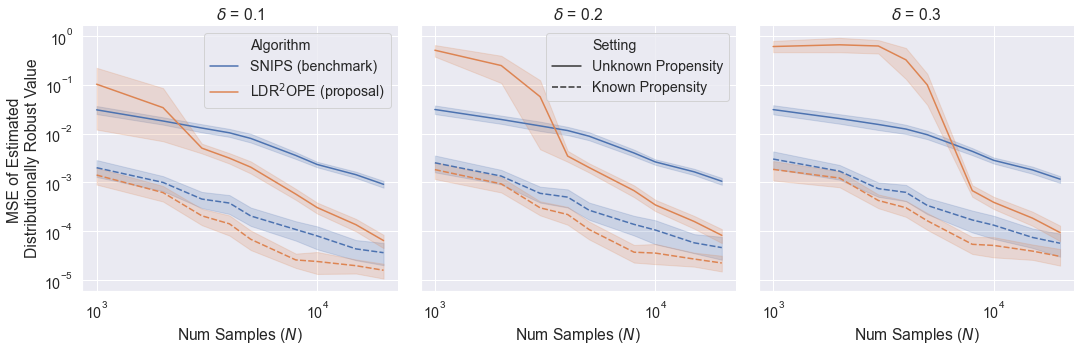

In [5]:
SNIPS_UNKNOWN_PROPENSITY = "xfitted_snips"
SNIPS_KNOWN_PROPENSITY = "snips"
LDR_UNKNOWN_PROPENSITY = "sn_ldr"
LDR_KNOWN_PROPENSITY = "ground_truth_propensity_sn_ldr"

DELTA_KEY = "$\delta$"
ALGO_KEY = "Algorithm"
BEHAVIOR_PROPENSITY_KEY = "Known Propensities?"

plot_df = df[
    df["algo"].isin([
        SNIPS_UNKNOWN_PROPENSITY,
        SNIPS_KNOWN_PROPENSITY,
        LDR_UNKNOWN_PROPENSITY,
        LDR_KNOWN_PROPENSITY,
    ])
].rename(
    columns={
        "algo": ALGO_KEY,
        "delta": DELTA_KEY,
    }
)
plot_df[BEHAVIOR_PROPENSITY_KEY] = False
plot_df.loc[plot_df[ALGO_KEY].isin([
        SNIPS_KNOWN_PROPENSITY,
        LDR_KNOWN_PROPENSITY,
]), BEHAVIOR_PROPENSITY_KEY] = True
plot_df.loc[plot_df[ALGO_KEY].isin([SNIPS_UNKNOWN_PROPENSITY, SNIPS_KNOWN_PROPENSITY]), ALGO_KEY] = "SNIPS (benchmark)"
plot_df.loc[plot_df[ALGO_KEY].isin([LDR_UNKNOWN_PROPENSITY, LDR_KNOWN_PROPENSITY]), ALGO_KEY] = "LDR$^2$OPE (proposal)"
display(plot_df)

mse_plot_df = plot_df.melt(
    id_vars=["n", DELTA_KEY, "seed", ALGO_KEY, BEHAVIOR_PROPENSITY_KEY], 
    value_vars=["mse_alpha", "mse_phi_n"],
)

g = sns.relplot(
    data=mse_plot_df[mse_plot_df["variable"] == "mse_phi_n"],
    x="n", y="value",
    hue=ALGO_KEY, 
    style=BEHAVIOR_PROPENSITY_KEY, 
    col=DELTA_KEY,
    kind="line",
    ci=90,
    facet_kws=dict(legend_out=False)
)
g.set(
    xscale="log", 
    yscale="log",
)
g.set_axis_labels("Num Samples ($N$)", "MSE of Estimated \nDistributionally Robust Value")

h,l = g.axes[0][0].get_legend_handles_labels()
g.axes[0][0].legend_.remove()
g.axes[0][0].legend(h[:3],l[:3], ncol=1, loc='upper right')
g.axes[0][1].legend(h[3:],["Setting","Unknown Propensity", "Known Propensity"], ncol=1, loc='upper right')
g.fig.savefig("eval.png")

## DROPL

In [6]:
paths = [
    "pkls/cdr.pkl",
    "pkls/xfit_snips.pkl",
]
df = pd.concat([pd.read_pickle(path) for path in paths])
# df = df[df["delta"].isin([0.1, 0.2, 0.3]) & df["n"].isin([5000,10000,15000,20000])].drop(columns=["optimizer", "lr"])
df

,delta,n,seed,algo,full_info_reward,snips_est_reward,full_info_0.1_dro_reward,snips_0.1_dro_reward,full_info_0.1_dro_alpha,snips_0.1_dro_alpha,...,snips_0.2_dro_alpha,full_info_0.3_dro_reward,snips_0.3_dro_reward,full_info_0.3_dro_alpha,snips_0.3_dro_alpha,full_info_0.5_dro_reward,snips_0.5_dro_reward,full_info_0.5_dro_alpha,snips_0.5_dro_alpha,train_obj
0,0.1,5000,0,cdr_gradient,0.711580,0.7105052,0.521247,0.520985,0.968406,0.962860,...,0.692496,0.377010,0.377860,0.579274,0.573470,0.274485,0.276564,0.461155,0.454664,0.535665
0,0.1,5000,1,cdr_gradient,0.712249,0.71068174,0.517051,0.514898,0.989028,0.991214,...,0.710848,0.370098,0.367930,0.589051,0.587464,0.265918,0.264320,0.468370,0.464376,0.538443
0,0.1,5000,2,cdr_gradient,0.719279,0.7276373,0.527293,0.536847,0.975330,0.964448,...,0.690948,0.381892,0.393977,0.585337,0.570569,0.277886,0.293415,0.470146,0.450387,0.529453
0,0.1,5000,3,cdr_gradient,0.698614,0.7009882,0.514166,0.514234,0.924398,0.940324,...,0.671604,0.378060,0.375314,0.540461,0.553382,0.283125,0.277936,0.423887,0.435472,0.506189
0,0.1,5000,4,cdr_gradient,0.709505,0.7036522,0.511253,0.504900,1.010388,1.012105,...,0.730443,0.360441,0.353980,0.607112,0.606870,0.252790,0.246474,0.485116,0.483974,0.543768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.3,20000,25,xfit_snips,0.705556,0.70478946,0.511160,0.513708,0.978881,0.959739,...,0.684420,0.366494,0.372102,0.576621,0.563610,0.264939,0.272916,0.454649,0.443728,0.394054
0,0.3,20000,26,xfit_snips,0.707625,0.7131683,0.525539,0.532278,0.914343,0.904376,...,0.641906,0.390534,0.399403,0.538012,0.526454,0.295693,0.307079,0.425181,0.411559,0.396310
0,0.3,20000,27,xfit_snips,0.705612,0.7033826,0.519496,0.516787,0.924816,0.928838,...,0.656056,0.384349,0.380912,0.532560,0.535796,0.291266,0.287287,0.413709,0.415831,0.399704
0,0.3,20000,28,xfit_snips,0.704489,0.7044825,0.521104,0.520888,0.921443,0.923280,...,0.658388,0.385167,0.384678,0.540812,0.541772,0.290056,0.289442,0.425160,0.425471,0.396180


In [7]:
df2 = df.melt(
    id_vars=["n", "delta", "seed", "algo"], 
    value_vars=[f"full_info_{delta}_dro_reward" for delta in [0.1,0.2,0.3]],
)
df2 = df2.drop(columns=["seed"])
df2

,n,delta,algo,variable,value
0,5000,0.1,cdr_gradient,full_info_0.1_dro_reward,0.521247
1,5000,0.1,cdr_gradient,full_info_0.1_dro_reward,0.517051
2,5000,0.1,cdr_gradient,full_info_0.1_dro_reward,0.527293
3,5000,0.1,cdr_gradient,full_info_0.1_dro_reward,0.514166
4,5000,0.1,cdr_gradient,full_info_0.1_dro_reward,0.511253
...,...,...,...,...,...
2155,20000,0.3,xfit_snips,full_info_0.3_dro_reward,0.366494
2156,20000,0.3,xfit_snips,full_info_0.3_dro_reward,0.390534
2157,20000,0.3,xfit_snips,full_info_0.3_dro_reward,0.384349
2158,20000,0.3,xfit_snips,full_info_0.3_dro_reward,0.385167


In [8]:
def df_filter(df, filter_fn):
    idxs = df.apply(filter_fn, axis=1)
    return df[idxs]

def filter_fn(row):
    delta = row["delta"]
    return row["variable"] == f"full_info_{delta}_dro_reward"

df3 = df_filter(df2, filter_fn)
df3 = df3.drop(columns=["variable"])
df3

,n,delta,algo,value
0,5000,0.1,cdr_gradient,0.521247
1,5000,0.1,cdr_gradient,0.517051
2,5000,0.1,cdr_gradient,0.527293
3,5000,0.1,cdr_gradient,0.514166
4,5000,0.1,cdr_gradient,0.511253
...,...,...,...,...
2155,20000,0.3,xfit_snips,0.366494
2156,20000,0.3,xfit_snips,0.390534
2157,20000,0.3,xfit_snips,0.384349
2158,20000,0.3,xfit_snips,0.385167


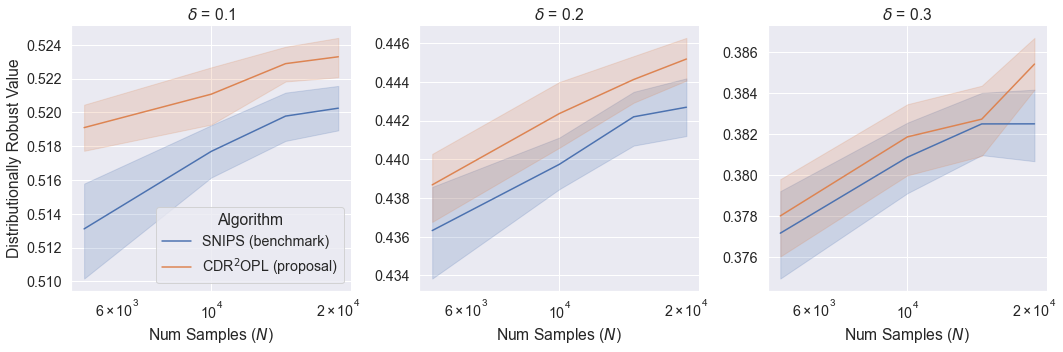

In [9]:

df3 = df3.rename(columns={
    "delta": DELTA_KEY,
    "algo": ALGO_KEY,
})

# plot_df.loc[plot_df[ALGO_KEY].isin([LDR_UNKNOWN_PROPENSITY, LDR_KNOWN_PROPENSITY]), ALGO_KEY] = "LDR$^2$OPE (proposal)"
df3.loc[df3[ALGO_KEY] == "xfit_snips", ALGO_KEY] = "SNIPS (benchmark)"
df3.loc[df3[ALGO_KEY] == "cdr_gradient", ALGO_KEY] = "CDR$^2$OPL (proposal)"

g = sns.relplot(
    data=df3,
    x="n", 
    y="value",    
    hue=ALGO_KEY, 
    hue_order = ["SNIPS (benchmark)", "CDR$^2$OPL (proposal)"],
    col=DELTA_KEY,
    kind="line",
    ci=90,
    facet_kws=dict(
        sharey=False,
        legend_out=False,
    ),
)

g.set(
    xscale="log", 
)
g.set_axis_labels("Num Samples ($N$)", "Distributionally Robust Value")
g.fig.savefig("learning.png")


## Examine dataset

In [10]:

import os

dataset = "linear_5"
num_samples = 3000
seed = 0
data_path = f"data/{dataset}/{seed}/{num_samples}.pkl"
test_data_path = f"data/{dataset}/{seed}/test.pkl"
meta_path = f"data/{dataset}/{seed}/meta.pkl"
assert os.path.isfile(data_path)
assert os.path.isfile(meta_path)
with open(data_path, "rb") as f:
    data = pickle.load(f)
    
with open(test_data_path, "rb") as f:
    test_data = pickle.load(f)

with open(meta_path, "rb") as f:
    metadata = pickle.load(f)


num_actions = metadata["num_actions"]
betas = np.array(metadata["betas"])
sigmas = np.array(metadata["sigmas"])

print(num_actions, betas, sigmas)

5 [[ 1.          0.        ]
 [ 0.30901699  0.95105652]
 [-0.80901699  0.58778525]
 [-0.80901699 -0.58778525]
 [ 0.30901699 -0.95105652]] [0.1 0.2 0.3 0.4 0.5]


For 1.0, DRO Bayes value is 0.1300150752067566 (est. 0.10734319686889648), corresponding to alpha=0.2854253649711609 (est. 0.3099123537540436)


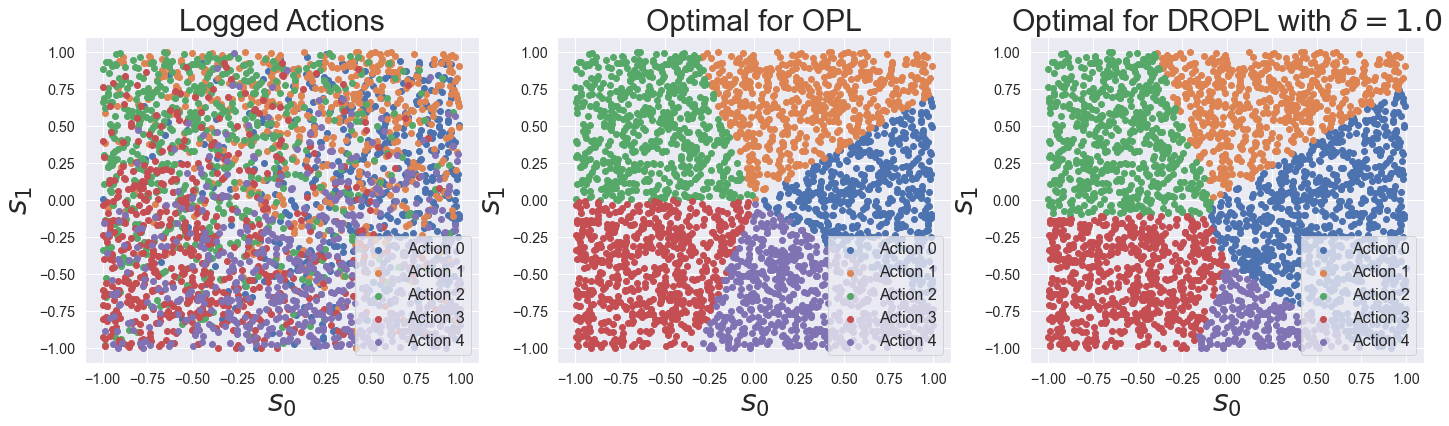

In [11]:
import jax
import jax.numpy as jnp
from scipy.optimize import minimize_scalar


def get_mgf_obj(mean_r_given_context, delta):
    @jax.jit
    def obj(alpha):
        mgf = jnp.exp(1./alpha * ( -mean_r_given_context + (sigmas**2)/(2*alpha) ) )
        to_max = -alpha * jnp.log(jnp.mean( jnp.min(mgf, axis=1) )) - alpha * delta
        return -to_max
    return obj

def get_empirical_obj(probs_mat, reward_mat, delta):
    assert probs_mat.shape == reward_mat.shape, f"{probs_mat.shape} != {reward_mat.shape}"
    @jax.jit
    def obj(alpha):
        est_mgf = (probs_mat * jnp.exp(-reward_mat / alpha)).sum(1)
        to_max = -alpha * jnp.log( jnp.mean(est_mgf) ) - alpha * delta
        return -to_max
    return obj


dro_opt_map = {}
for delta in [
    1.0,
]:
    mus = data.s @ betas.T
    
    mgf_obj = get_mgf_obj(mus, delta)
    opt_res = minimize_scalar(
        mgf_obj,
        bounds=[1e-4,1e4], method='bounded',
    )
    assert opt_res.success, opt_res
    phi_val = -opt_res.fun
    opt_alpha = opt_res.x

    dro_opt_a = np.argmax( mus - (sigmas**2)/(2*opt_alpha), axis=1 )

    emp_obj = get_empirical_obj(probs_mat=jax.nn.one_hot(dro_opt_a, num_actions), reward_mat=data.reward_mat, delta=delta)
    est_res = minimize_scalar(
        emp_obj,
        bounds=[1e-4,1e4], method='bounded',
    )
    assert est_res.success
    est_phi_val = -est_res.fun
    est_alpha = est_res.x
    print(f"For {delta}, DRO Bayes value is {phi_val} (est. {est_phi_val}), corresponding to alpha={opt_alpha} (est. {est_alpha})")
    dro_opt_map[delta] = dro_opt_a
    

    
def plot_tree(dim1, dim2, features, actions_map):
    j = 0
    fig, axs = plt.subplots(1, len(actions_map), figsize=(8 * len(actions_map), 6))
    for k, actions in actions_map.items():
        ax = axs[j]
        j += 1

        num_regions = actions.max().astype(np.int32) + 1
        for i in range(num_regions):
            scatter = ax.scatter(
                x=features[actions == i, dim1],
                y=features[actions == i, dim2],
                label=f"Action {i}",
            )

        ax.set_title(k, fontsize=30)
        ax.set_xlabel(f"$s_{dim1}$", fontsize=30)
        ax.set_ylabel(f"$s_{dim2}$", fontsize=30)
        ax.legend(loc="lower right", fontsize=16)
    return fig


fig = plot_tree(0, 1, data.s, {
    "Logged Actions": data.a,
    "Optimal for OPL": data.opt_a,
    "Optimal for DROPL with $\delta = 1.0$": dro_opt_map[1.0]
})
fig.savefig("env.png")